<a href="https://colab.research.google.com/github/lamtruong2002/baitapAItuan5/blob/main/baitap5_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f165f8697981aa44938c3a027fb6651ca90c27365667d0ccd4998c3d372ec2e4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


0.8754741024656537


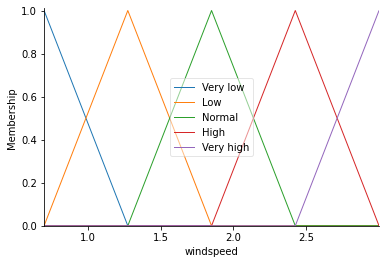

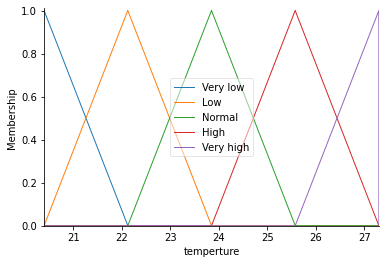

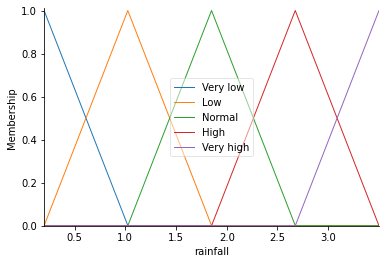

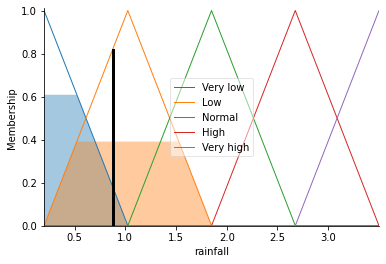

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
windspeed = ctrl.Antecedent(np.arange(0.7,3,0.001),'windspeed')
temperture = ctrl.Antecedent(np.arange(20.4,27.3,0.001),'temperture')
rainfall= ctrl.Consequent(np.arange(0.2,3.5,0.001),"rainfall")

windspeed["Very low"]=fuzz.trimf(windspeed.universe,[0.7,0.7,1.275])
windspeed["Low"]=fuzz.trimf(windspeed.universe,[0.7,1.275,1.85])
windspeed["Normal"]=fuzz.trimf(windspeed.universe,[1.275,1.85,2.425])
windspeed["High"]=fuzz.trimf(windspeed.universe,[1.85,2.425,3])
windspeed["Very high"]=fuzz.trimf(windspeed.universe,[2.425,3,3])
windspeed.view()

temperture["Very low"]= fuzz.trimf(temperture.universe,[20.4,20.4,22.125])
temperture["Low"]= fuzz.trimf(temperture.universe,[20.4,22.125,23.85])
temperture["Normal"]= fuzz.trimf(temperture.universe,[22.125,23.85,25.575])
temperture["High"]= fuzz.trimf(temperture.universe,[23.85,25.575,27.3])
temperture["Very high"]= fuzz.trimf(temperture.universe,[25.575,27.3,27.3])
temperture.view()

rainfall["Very low"]=fuzz.trimf(rainfall.universe,[0.2,0.2,1.025])
rainfall["Low"]=fuzz.trimf(rainfall.universe,[0.2,1.025,1.85])
rainfall["Normal"]=fuzz.trimf(rainfall.universe,[1.025,1.85,2.675])
rainfall["High"]=fuzz.trimf(rainfall.universe,[1.85,2.675,3.5])
rainfall["Very high"]=fuzz.trimf(rainfall.universe,[2.675,3.5,3.5])
rainfall.view()
rule1= ctrl.Rule(windspeed["Very low"]&temperture["Very low"] | windspeed["Very low"]&temperture["Low"] | windspeed["Low"]&temperture["Very low"], rainfall["Very low"])
rule2= ctrl.Rule(windspeed["Very low"]&temperture["Normal"]|windspeed["Very low"]&temperture["High"]|windspeed["Low"]&temperture["Low"]|windspeed["Low"]&temperture["Normal"]|windspeed["Normal"]&temperture["Very low"]|windspeed["Normal"]&temperture["Low"], rainfall["Low"])
rule3= ctrl.Rule(windspeed["Low"]&temperture["High"]|windspeed["Very low"]&temperture["Very high"]|windspeed["Normal"]&temperture["Normal"]|windspeed["Normal"]&temperture["High"], rainfall["Normal"])
rule4= ctrl.Rule(windspeed["High"]&temperture["Low"]|windspeed["High"]&temperture["Normal"]|windspeed["Very high"]&temperture["Very low"]|windspeed["Very high"]&temperture["Low"], rainfall["Normal"])
rule5= ctrl.Rule(windspeed["Low"]&temperture["Very high"]|windspeed["Normal"]&temperture["Very high"]|windspeed["High"]&temperture["High"]|windspeed["High"]&temperture["Very high"]|windspeed["Very high"]&temperture["Normal"],rainfall["High"])
rule6 =ctrl.Rule(windspeed["Very high"]&temperture["High"]|windspeed["Very high"]&temperture["Very high"],rainfall["Very high"])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['windspeed'] = 1.5
rainfalling.input['temperture'] = 20
rainfalling.compute()
rainfall.view(sim = rainfalling)
print(rainfalling.output["rainfall"])